## Generate artificial data with implanted motifs

In [1]:
import numpy as np
import os
import pandas as pd
from Bio import SeqIO
import random
import itertools

#### set motif parameters

In [2]:
append = False

alphabet = ['A','C','G','T']
random_3mers = [''.join(p) for p in itertools.product(alphabet, repeat=3)]

core1 = ['TAG']
core2 = ['ACT']
l = 3
r = 40
p = 0.8

#alphabet2 = ['A']
seq_length = 40
no_sequences = 15000  #positive and negative
ratio_with_motif = 1

#### generate sequences

In [3]:
def generate_sequences(no_sequences):
    no_motifs = int(no_sequences*ratio_with_motif)
    #generate random sequences 
    positive_sequences = [''.join([random.choice(alphabet) for i in range(seq_length)]) for j in range(no_sequences)]
    negative_sequences = [''.join([random.choice(alphabet) for i in range(seq_length)]) for j in range(no_sequences)]

    #assume one motif per sequence
    seqs_to_insert = random.sample(range(no_sequences),no_motifs) #select sequences for motif insertion

    for i in seqs_to_insert:
        seq = positive_sequences[i]

        dist = np.random.negative_binomial(r, p, 1)[0]  #motif distances
        ins = random.choice(range(0, max(1,seq_length-l*2-dist)))  #insertion position
        c1 = random.choice(core1)    #select core 1 
        c2 = random.choice(core2)    #select core 2

        seq = list(seq)   #convert to list for indexing
        for pos in range(len(c1)):  #insert core 1
            if pos + ins < len(seq):
                seq[pos+ins] = c1[pos]

        for pos in range(len(c2)):   #insert core 2
            if pos + ins + dist + len(c1) < len(seq):
                seq[pos+ins+dist+len(c1)] = c2[pos]

        seq = ''.join(seq)

        positive_sequences[i] = seq
    
    return positive_sequences, negative_sequences

#### save sequences as fasta or fastq files

In [4]:
def write_seqs(positive_sequences, negative_sequences, file_pos, file_neg):
    #write positives to file
    with open(file_pos, 'a' if append else 'w') as f:
        for i, seq in enumerate(positive_sequences):
            print('> header', i+1, file=f)
            print(seq, file=f)

    #write negatives to file
    with open(file_neg, 'w') as f:
        for i, seq in enumerate(negative_sequences):
            print('> header', i+1, file=f)
            print(seq, file=f)

In [5]:
def write_seqs_fastq(positive_sequences, negative_sequences, file_pos, file_neg):
    #write positives to file
    with open(file_pos + '.fastq', 'a' if append else 'w') as f:
        for i, seq in enumerate(positive_sequences):
            print('@header', i+1, file=f)
            print(seq, file=f)
            print('+', file=f)
            print(''.join(['~']*len(seq)), file=f)

    #write negatives to file
    with open(file_neg + '.fastq', 'w') as f:
        for i, seq in enumerate(negative_sequences):
            print('@header', i+1, file=f)
            print(seq, file=f)
            print('+', file=f)
            print(''.join(['~']*len(seq)), file=f)
            
def write_seqs_fasta(positive_sequences, negative_sequences, file_pos, file_neg):
    #write positives to file
    with open(file_pos + '.fasta', 'a' if append else 'w') as f:
        for i, seq in enumerate(positive_sequences):
            print('>header', i+1, file=f)
            print(seq, file=f)

    #write negatives to file
    with open(file_neg + '.fasta', 'w') as f:
        for i, seq in enumerate(negative_sequences):
            print('>header', i+1, file=f)
            print(seq, file=f)

#### generate dataset

In [6]:
write_seqs_fastq(*generate_sequences(150000), 'positives_toy', 'negatives_toy')

In [9]:
_ = generate_sequences(no_sequences)

In [12]:
distance_pairs = np.array(distance_pairs)

(array([2572., 1911., 1992., 1878., 1881., 1728., 1512., 1018.,  427.,
          81.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

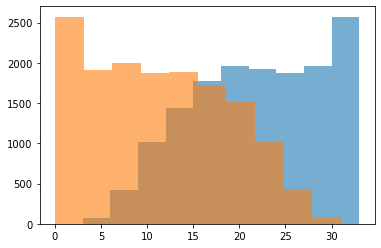

In [19]:
from matplotlib import pyplot as plt
plt.hist(distance_pairs[:,1], alpha=0.6)
plt.hist(distance_pairs[:,0], alpha=0.6)

In [47]:
distance_pairs = []
_ = generate_sequences(200000)
distance_pairs = np.array(distance_pairs)

(array([2.4000e+01, 2.0300e+02, 9.1300e+02, 2.4580e+03, 5.2050e+03,
        9.2750e+03, 1.3779e+04, 1.8014e+04, 2.1143e+04, 2.2772e+04,
        2.2430e+04, 2.0274e+04, 1.7600e+04, 1.3982e+04, 1.0617e+04,
        7.6270e+03, 5.1290e+03, 3.3690e+03, 2.1580e+03, 1.3000e+03,
        7.6800e+02, 4.4500e+02, 2.3800e+02, 1.3100e+02, 7.3000e+01,
        3.5000e+01, 2.4000e+01, 6.0000e+00, 6.0000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Patch objects>)

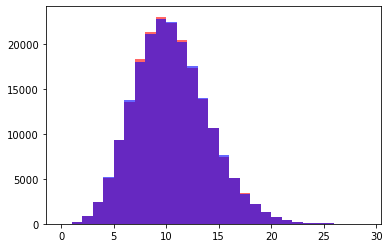

In [48]:
plt.close()
plt.hist(distance_pairs[:,1]-distance_pairs[:,0], bins=np.arange(30), alpha=0.6, color='r')
plt.hist(np.random.negative_binomial(r, p, 200000), bins=np.arange(30),alpha=0.6, color='b')

In [51]:
from scipy.stats import nbinom

(0, 2503.6000000000004)

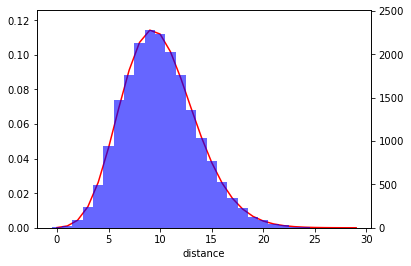

In [63]:
fig, ax = plt.subplots(figsize=(6,4))
xrange = 30
xx = np.arange(xrange)
    
ax.plot(xx, nbinom.pmf(xx, r, p), color='red')
ax.set_xlabel('distance')

ax2 = ax.twinx()
bincounts = np.bincount(np.random.negative_binomial(r, p, 20000))
ax2.bar(np.arange(len(bincounts)), bincounts, width=1,alpha=0.6, color='b')

ax.set_ylim(0,max(nbinom.pmf(xx, r, p))*1.1)
ax2.set_ylim(0,max(bincounts)*1.1)

<BarContainer object of 27 artists>

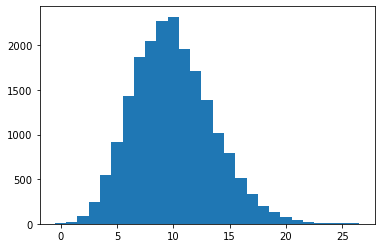

In [61]:
bincounts = np.bincount(np.random.negative_binomial(r, p, 20000))
plt.bar(np.arange(len(bincounts)), bincounts, width=1)